# application train data cleaning

## Import libraries

In [1]:
import sys
sys.path.insert(0, '../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import modules.missing as ms
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
main = pd.read_csv('.././data/application_train.csv')

## Preliminary Analysis

In [3]:
pd.set_option('display.max_columns', None)

display(main.sample(10))
print(f'Application train data contains: \n{main.shape[0]} rows and {main.shape[1]} columns')
print(f'\nApplication train data information:\n')
print(main.info())
print(f'\nStatistical Summary of numerical columns:\n')

numerical = main.select_dtypes(include='number')
display(numerical.describe())

categorical = main.select_dtypes(include='object')
display(categorical.describe())

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
56761       165779       0         Cash loans           F            N   
196956      328363       0         Cash loans           F            N   
272445      415865       0         Cash loans           M            N   
10994       112801       0         Cash loans           F            N   
125576      245623       0         Cash loans           M            Y   
121225      240544       0         Cash loans           F            Y   
18266       121309       1         Cash loans           M            N   
125162      245147       0         Cash loans           F            N   
45242       152405       0         Cash loans           F            Y   
285050      430125       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
56761                Y             0          157500.0    284427.0   
196956               Y             0          135000.0    868500.0   
272445               Y             0          112500.0    545040.0   
10994                N             1           99000.0    360000.0   
125576               Y             0          247500.0    697500.0   
121225               Y             0          166500.0   1298970.0   
18266                Y             0          382500.0   1190340.0   
125162               Y             0          202500.0    104256.0   
45242                Y             1          202500.0   1129500.0   
285050               N             3          126000.0    755190.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
56761       18306.0         216000.0   Unaccompanied             Pensioner   
196956      28017.0         868500.0   Unaccompanied               Working   
272445      20677.5         450000.0   Unaccompanied             Pensioner   
10994       18508.5         360000.0   Unaccompanied         State servant   
125576      18526.5         697500.0   Unaccompanied             Pensioner   
121225      46786.5        1147500.0          Family             Pensioner   
18266       66595.5        1125000.0   Unaccompanied  Commercial associate   
125162      11920.5          90000.0   Unaccompanied               Working   
45242       31059.0        1129500.0   Unaccompanied               Working   
285050      31995.0         675000.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
56761   Secondary / secondary special            Married  House / apartment   
196956  Secondary / secondary special            Married  House / apartment   
272445  Secondary / secondary special              Widow  House / apartment   
10994   Secondary / secondary special     Civil marriage  House / apartment   
125576               Higher education            Married  House / apartment   
121225               Higher education            Married  House / apartment   
18266   Secondary / secondary special            Married  House / apartment   
125162  Secondary / secondary special              Widow  House / apartment   
45242                Higher education            Married  House / apartment   
285050  Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
56761                     0.019101      -23362         365243   
196956                    0.072508      -14395           -761   
272445                    0.008068      -22158         365243   
10994                     0.015221      -11742          -1618   
125576                    0.028663      -22387         365243   
121225                    0.009630      -20380         365243   
18266                     0.046220      -14371          -1081   
125162                    0.010643      -18354          -4349   
45242                     0.030755      -12170          -3300   
285050                    0.025164      -11

Application train data contains: 
307511 rows and 122 columns

Application train data information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

Statistical Summary of numerical columns:



SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

## Duplicate values checking

In [4]:
dup = main.duplicated().sum()
print(f'Duplicate rows in the dataset: {dup}')

Duplicate rows in the dataset: 0


## Missing Values Checking and Handling

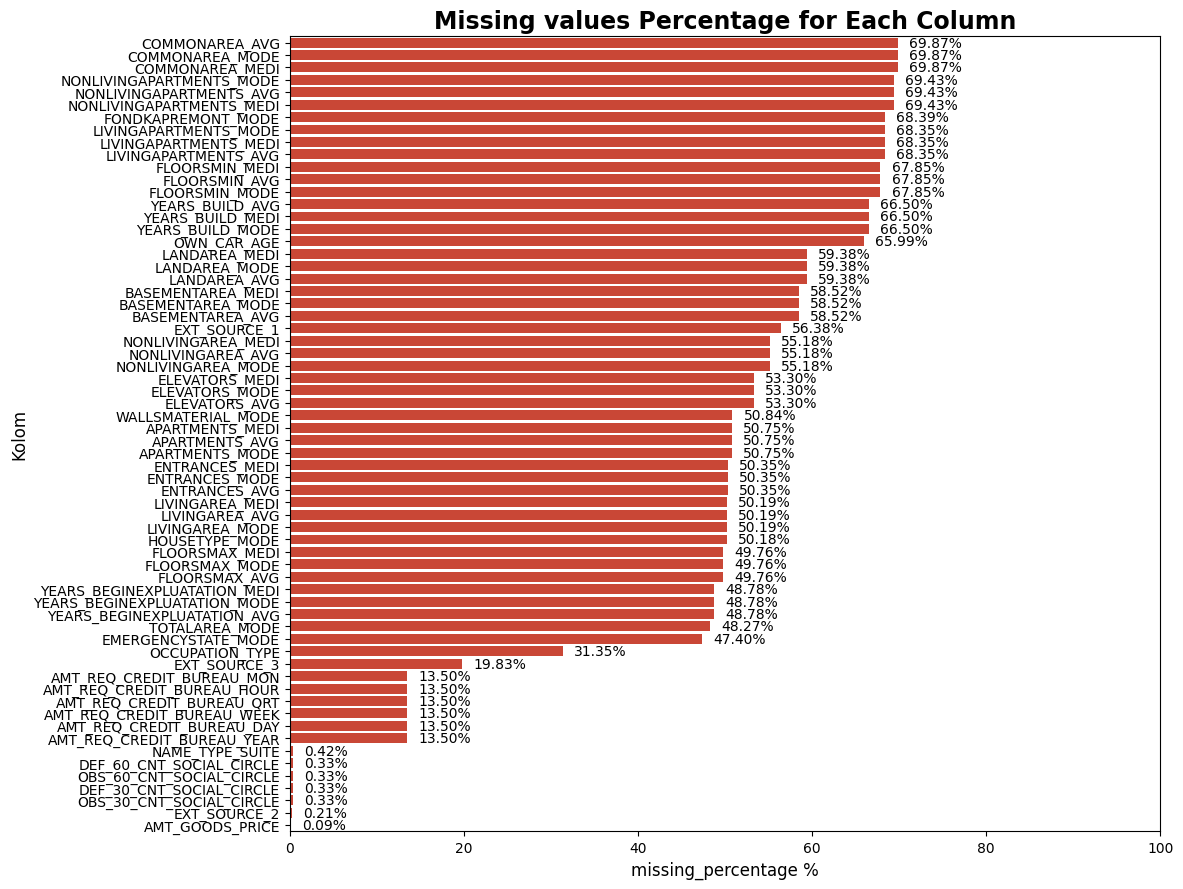

In [5]:
ms.plot_missing_percentage(main)

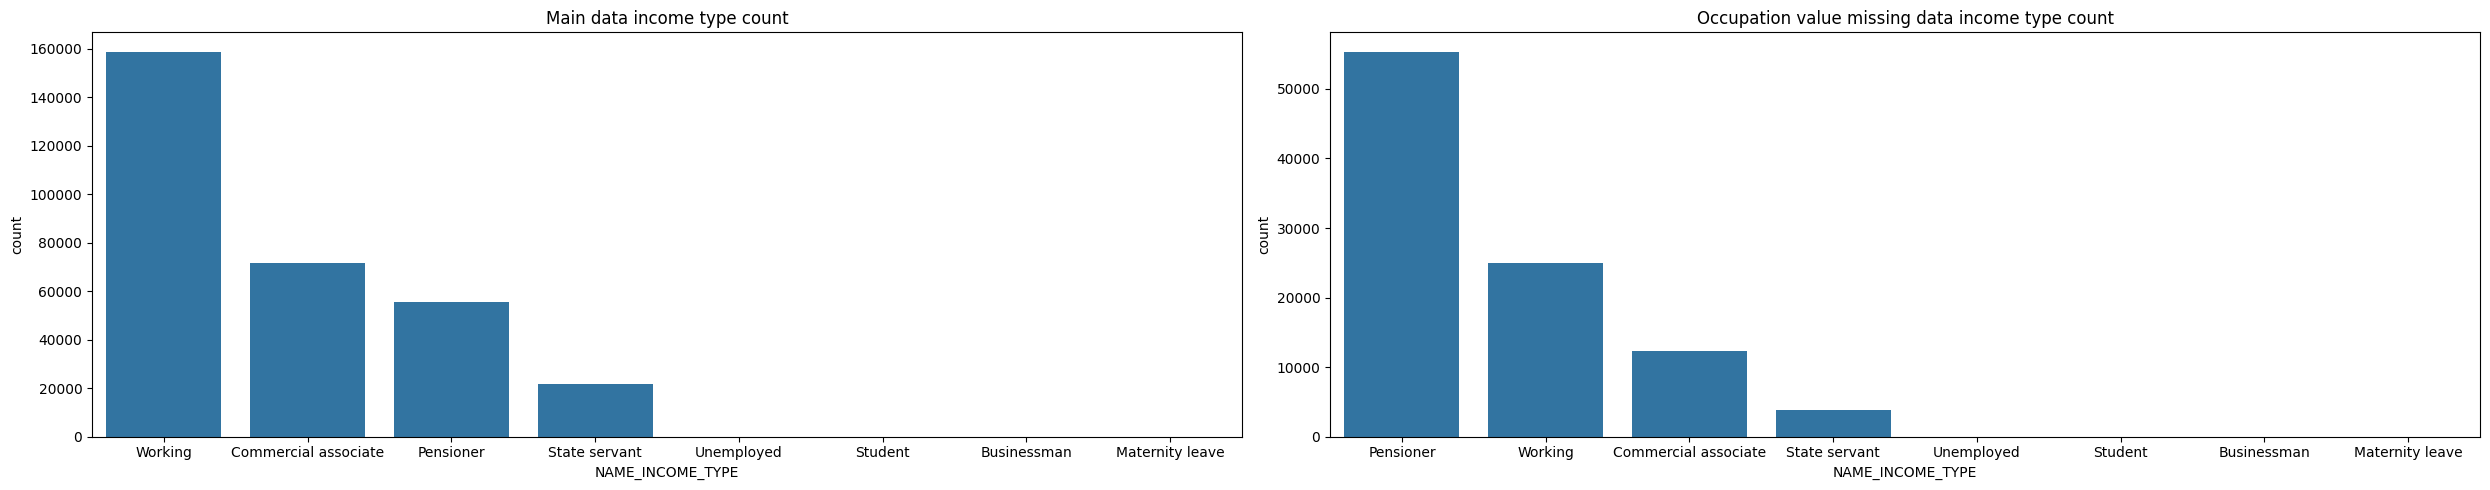

In [18]:
occp = main[main['OCCUPATION_TYPE'].isnull()]

fig, axs = plt.subplots(1, 2, figsize=(25, 5))
counts_order1 = main.NAME_INCOME_TYPE.value_counts()
sns.countplot(x='NAME_INCOME_TYPE', data=main, ax=axs[0], order=counts_order1.index)
axs[0].set_title('Main data income type count')

counts_order2 = occp.NAME_INCOME_TYPE.value_counts()
sns.countplot(x='NAME_INCOME_TYPE', data=occp, ax=axs[1], order=counts_order2.index)
axs[1].set_title('Occupation value missing data income type count')

plt.tight_layout()
plt.show()

From the barplot above we can see that when the occupation type is missing, the client with pensioner type is the most frequent. but on the main data, income type Working is the most frequent.<br>
also the `NAME_INCOME_TYPE` missing values is more than 30% of the data, so my last decision is to drop this column, because if we fill it with Working value, or Pensioner, it will be a bias in the data.<br><br>
The columns with 10% missing values like `AMT_REQ_CREDIT_BUREAU_MON` and etc, will be dropped because i don't think that they will be useful. 

In [41]:
# Drop missing values with a threshold of missing values from all the data > 10%
clean_main = ms.dropnan(main, 0.1)

# fill missing values on categorical column NAME_TYPE_SUITE with mode
clean_main.NAME_TYPE_SUITE.fillna(clean_main.NAME_TYPE_SUITE.mode()[0], inplace=True)

# fill missing values on numerical columns with 0 because from the pattern analysis of the data this method is reasonable
main_cleaned = clean_main.fillna(0)

# check appliation train data shape after cleaning
print(f'application train data before cleaning: {main.shape[0]} rows and {main.shape[1]} columns')
print(f'application train data after cleaning: {main_cleaned.shape[0]} rows and {main_cleaned.shape[1]} columns')

application train data before cleaning: 307511 rows and 122 columns
application train data after cleaning: 307511 rows and 65 columns


In [43]:
main_cleaned.to_csv('.././data/application_train_cleaned.csv', index=False)